## Tokenization Types And Comparison with its tokenization time

In [ ]:
import nltk
nltk.download('punkt')

text = "This is an example sentence. Here's another one."
words = nltk.word_tokenize(text)
print(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'is', 'an', 'example', 'sentence', '.', 'Here', "'s", 'another', 'one', '.']


In [ ]:
text = "This is an example sentence. Here's another one."
characters = list(text)
print(characters)


['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', 'n', ' ', 'e', 'x', 'a', 'm', 'p', 'l', 'e', ' ', 's', 'e', 'n', 't', 'e', 'n', 'c', 'e', '.', ' ', 'H', 'e', 'r', 'e', "'", 's', ' ', 'a', 'n', 'o', 't', 'h', 'e', 'r', ' ', 'o', 'n', 'e', '.']


In [ ]:
import nltk
nltk.download('punkt')

text = "This is an example sentence. Here's another one. Here's a third."
sentences = nltk.sent_tokenize(text)
print(sentences)


['This is an example sentence.', "Here's another one.", "Here's a third."]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install tokenizers

from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers

text = "This is an example sentence. Here's another one."

# Define the BERT-based tokenizer model
tokenizer = Tokenizer(models.BPE())

# Define the pre-tokenization steps
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Define the post-tokenization steps
tokenizer.decoder = decoders.WordPiece()

# Train the tokenizer on the text
trainer = trainers.BpeTrainer(special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"])
tokenizer.train_from_iterator([text], trainer=trainer)

# Tokenize the text
encoding = tokenizer.encode(text)
print(encoding.tokens)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.6 MB/s eta 0:00:00
['This', 'is', 'an', 'example', 'sentence', '.', 'Here', "'", 's', 'another', 'one', '.']


In [ ]:
!pip install tokenizers

from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers

text = "This is an example sentence. Here's another one."

# Define the BERT-based tokenizer model
tokenizer = Tokenizer(models.BPE())

# Define the pre-tokenization steps
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Define the post-tokenization steps
tokenizer.decoder = decoders.WordPiece()

# Train the tokenizer on the text using BPE
trainer = trainers.BpeTrainer(special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"], vocab_size=1000)
tokenizer.train_from_iterator([text], trainer=trainer)

# Tokenize the text
encoding = tokenizer.encode(text)
print(encoding.tokens)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['This', 'is', 'an', 'example', 'sentence', '.', 'Here', "'", 's', 'another', 'one', '.']


In [ ]:
import time
import nltk
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers

# Define the text to tokenize
text = "This is an example sentence. Here's another one. " * 10000

# Word-based tokenization using NLTK
start_time = time.time()
words = nltk.word_tokenize(text)
word_tokenization_time = time.time() - start_time
print(f"Word-based tokenization time: {word_tokenization_time:.5f} seconds")

# Character-based tokenization
start_time = time.time()
characters = list(text)
char_tokenization_time = time.time() - start_time
print(f"Character-based tokenization time: {char_tokenization_time:.5f} seconds")

# Subword-based tokenization using Hugging Face Tokenizers
start_time = time.time()
tokenizer = Tokenizer(models.BPE())
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
tokenizer.decoder = decoders.WordPiece()
trainer = trainers.BpeTrainer(special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"])
tokenizer.train_from_iterator([text], trainer=trainer)
encoding = tokenizer.encode(text)
subword_tokenization_time = time.time() - start_time
print(f"Subword-based tokenization time: {subword_tokenization_time:.5f} seconds")

# Sentence-based tokenization using NLTK
start_time = time.time()
sentences = nltk.sent_tokenize(text)
sentence_tokenization_time = time.time() - start_time
print(f"Sentence-based tokenization time: {sentence_tokenization_time:.5f} seconds")

# Byte-pair encoding (BPE) tokenization using Hugging Face Tokenizers
start_time = time.time()
tokenizer = Tokenizer(models.BPE())
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
tokenizer.decoder = decoders.WordPiece()
trainer = trainers.BpeTrainer(special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"], vocab_size=1000)
tokenizer.train_from_iterator([text], trainer=trainer)
encoding = tokenizer.encode(text)
bpe_tokenization_time = time.time() - start_time
print(f"BPE-based tokenization time: {bpe_tokenization_time:.5f} seconds")


Word-based tokenization time: 1.36621 seconds
Character-based tokenization time: 0.00370 seconds
Subword-based tokenization time: 0.31966 seconds
Sentence-based tokenization time: 0.37566 seconds
BPE-based tokenization time: 0.25658 seconds


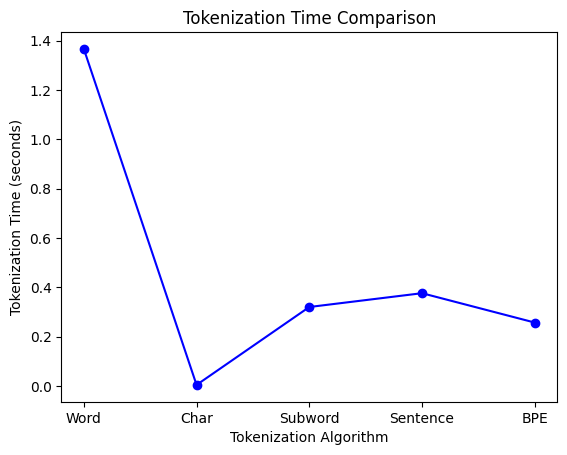

In [ ]:
import matplotlib.pyplot as plt

# Define the tokenization times
word_tokenization_time = 1.36621
char_tokenization_time = 0.00370
subword_tokenization_time = 0.31966
sentence_tokenization_time = 0.37566
bpe_tokenization_time = 0.25658

# Define the x-axis labels
x_labels = ['Word', 'Char', 'Subword', 'Sentence', 'BPE']

# Define the y-axis values
y_values = [word_tokenization_time, char_tokenization_time, subword_tokenization_time, sentence_tokenization_time, bpe_tokenization_time]

# Create the line plot
plt.plot(x_labels, y_values, marker='o', color='blue')

# Add labels and title
plt.xlabel('Tokenization Algorithm')
plt.ylabel('Tokenization Time (seconds)')
plt.title('Tokenization Time Comparison')

# Display the plot
plt.show()


# SP CP Code Twitter SENTIMENT ANALYSIS GRP-8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the necessary dependencies :

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries and functions :
import pandas as pd
import numpy as np
from math import sqrt
import time

# Text processing libraries :
# !pip install gensim
import gensim #a library for topic modeling and document similarity.
import re # Regular Expression library
import string
import nltk #for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize # Tokenizaion
from spacy.lang.en import English # english language processing
from spacy.lang.en.stop_words import STOP_WORDS

# Plotting libraries :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# sklearn :
import sklearn
# from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/SP/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display of the first 5 lines :
df.sample(5)

target         ids                          date      flag  \
1548351       4  2183019397  Mon Jun 15 13:56:25 PDT 2009  NO_QUERY   
1182648       4  1982282785  Sun May 31 10:53:56 PDT 2009  NO_QUERY   
1567417       4  2187991313  Mon Jun 15 21:07:23 PDT 2009  NO_QUERY   
556507        0  2204294995  Wed Jun 17 01:50:29 PDT 2009  NO_QUERY   
1056647       4  1962571784  Fri May 29 11:15:13 PDT 2009  NO_QUERY   

                  user                                               text  
1548351       onerstay            @Ddomenic You have a great week also!    
1182648     Nina_Parks  @Balance510 LMAO no I was thinkin..I hope this...  
1567417     seanmychal  &quot;Roofies? Why don't they call em floories...  
556507          as1406                    Having hard time with my study   
1056647  element3media          @Innovadia THANKS for the #FF mention..

In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
print('length of our data is {} tweets'.format(len(df)))

length of our data is 1600000 tweets


In [ ]:
print("The shape of our dataset is {}".format(df. shape))

The shape of our dataset is (1600000, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
print(df.dtypes)

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


check null values

In [ ]:
print("number of missing values in the dataframe is {}".format(np.sum(df.isnull().any(axis=1))))

number of missing values in the dataframe is 0


4 cols - string values (date, flag, user, text)

```

```
2 cols - integers (target, ids)


In [ ]:
df['target'].unique() #returns an array of unique values

array([0, 4])

In [ ]:
df['target'].nunique()

2

In [ ]:
print("the number of unique values of the target variable is {}".format(df['target'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['target'].unique()[0],df['target'].unique()[1]))

the number of unique values of the target variable is 2
unique values of target variable are 0 and 4


The target column is composed of just 0 and 4

0 stands for negative sentiment.

4 stands for positive sentiment.

In [ ]:
# Replacing the values to ease understanding :
df['target'] = df['target'].replace(4,1)

The target column is composed of just 0 and 1

0 stands for negative sentiment.

1 stands for positive sentiment.

In [ ]:
print("The number of unique values of the ids feature is {}".format(df['ids'].nunique()))

The number of unique values of the ids feature is 1598315


Since the number of unique values of the Ids is less than the length of our dataset, it means that the Ids have to be repeated. in other words, there might be tweets that have the same ID or repeat each other

In [ ]:
# Exploring our date feature :
print("The number of unique values of the date feature is {}".format(df['date'].nunique()))

The number of unique values of the date feature is 774363


In [ ]:
# Exploring the flag feature :
print("The number of unique values of the ids feature is {}".format(df['flag'].nunique()))
print("Unique values of ids feature are {}".format(df['flag'].unique()[0]))

The number of unique values of the ids feature is 1
Unique values of ids feature are NO_QUERY


In [ ]:
# Explore the user feature :
print("The number of unique values of the user feature is {}".format(df['user'].nunique()))

The number of unique values of the user feature is 659775


Since the number of users is less than the number of tweets, there must be users in our dataset who posted more than one tweet.

In [ ]:
# Reviewing duplicates in tweet feature :
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))

The number of unique values of the text feature is 1581466


In [ ]:
df.groupby('target').count()

ids    date    flag    user    text
target                                        
0       800000  800000  800000  800000  800000
1       800000  800000  800000  800000  800000

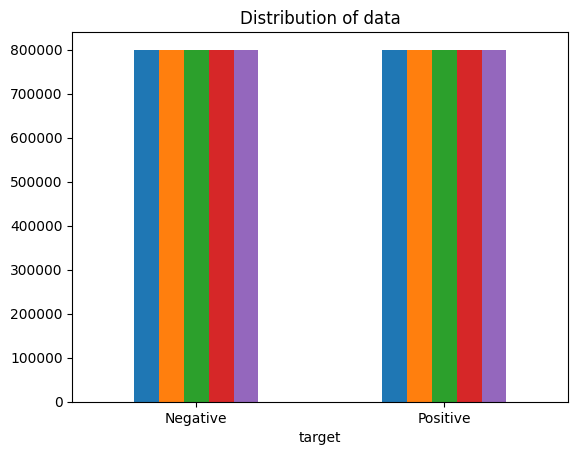

In [ ]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

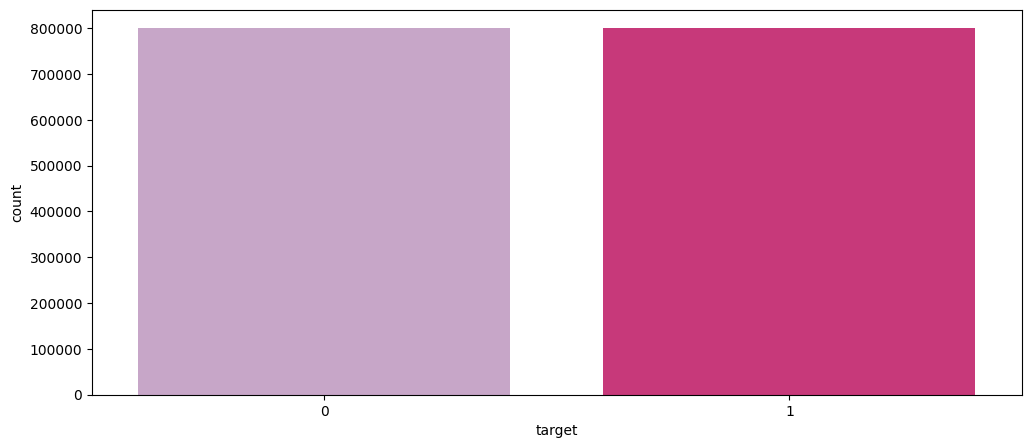

In [ ]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=df, x="target", palette="PuRd")

In [ ]:
# Lowering Case :
print("=========== Before Lowering case ============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Lowering case ===========\n")
df['text'] = df['text'].str.lower()
print("\t" + df.loc[10, "text"])

=========== Before Lowering case ============

	spring break in plain city... it's snowing 

=========== After Lowering case ===========

	spring break in plain city... it's snowing 


In [ ]:
# Removal of Mentions:

## Creating a fucntion that will be applied to our datset :
def RemoveMentions(text):
    text_ = re.sub(r"@\S+", "", text)
    return text_


## Applying the function to each row of the data
print("=========== Before Removing Mentions ============\n")
print("\t" + df.loc[5, "text"])
print("\n=========== After Removing Mentions ===========\n")
df["text"] = df["text"].apply(RemoveMentions)
print("\t" + df.loc[5, "text"])

=========== Before Removing Mentions ============

	@kwesidei not the whole crew 

=========== After Removing Mentions ===========

	 not the whole crew 


In [ ]:
# Defining a list containing punctuation signs of english :
punctuations_list = string.punctuation


## Defining that will be applied to our datset :
def RemovePunctuations(text):
    transformator = str.maketrans('', '', punctuations_list)
    return text.translate(transformator)


## Applying the fucntion to all rows :
print("=========== Before Removing Punctuations =============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Removing Punctuations \===========\n")
df["text"] = df["text"].apply(RemovePunctuations)
print("\t" + df.loc[10, "text"])

=========== Before Removing Punctuations =============

	spring break in plain city... it's snowing 

=========== After Removing Punctuations \===========

	spring break in plain city its snowing 


In [ ]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [ ]:
# Getting the pre defined stop words from nltk library :
nltk.download("stopwords")
stopwords = stopwords.words('english')

## Copying the df to use other libraries (spacy and gensim)
df_copy1 = df.loc[:100].copy(deep=True)
df_copy2 = df.copy(deep=True)  # deep copy to create another df

## Applying the fucntion to all rows
print("=========== Before Removing Stop words ============\n")
print("\t" + df_copy2.loc[12, "text"])
print("\n=========== After Removing Stop words ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy2['text'] = df_copy2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print("\t" + df_copy2.loc[12, "text"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=========== Before Removing Stop words ============

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words ===========

	couldnt bear watch thought ua loss embarrassing


In [ ]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [ ]:
## Creating a fucntion that will be applied to our datset :
def RemoveStopsSpacy(text):
    # Load English tokenizer, tagger, parser, NER and word vectors
    nlp = English()

    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(text)

    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    # Create list of word tokens after removing stopwords
    filtered_sentence = []

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return filtered_sentence


## Applying the fucntion to all rows
print("=========== Before Removing Stop words with spaCy ===========\n")
print("\t" + df_copy1.loc[12, "text"])
print("\n=========== After Removing Stop words with spaCy ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy1['text'] = df_copy1['text'].apply(lambda x: ' '.join(RemoveStopsSpacy(x)))
print("\t" + df_copy1.loc[12, "text"])

=========== Before Removing Stop words with spaCy ===========

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with spaCy ===========

	  nt bear watch   thought ua loss embarrassing     


In [ ]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [ ]:
## Applying the function to all rows
print("=========== Before Removing Stop words with Gensim =======\n")
print("\t" + df.loc[12, "text"])
print("\n=========== After Removing Stop words with Gensim =======\n")
df['text'] = df['text'].apply(lambda x: gensim.parsing.preprocessing.remove_stopwords(x))
print("\t" + df.loc[12, "text"])

=========== Before Removing Stop words with Gensim =======

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with Gensim =======

	bear watch thought ua loss embarrassing


In [ ]:
## Creating a fucntion that will be applied to our datset :
def RemoveLinks(text):
    return re.sub(r"http\S+", "", text)


## Applying the fucntion to all rows of our dataset :
print("=========== Before Removing Hyperlinks =======\n")
print("\t" + df.loc[0, "text"])  # let's see for example the first row, which contains an hyperlink.
print("\n=========== After Removing Hyperlinks =======\n")
df['text'] = df['text'].apply(RemoveLinks)
print("\t" + df.loc[0, "text"])

=========== Before Removing Hyperlinks =======

	httptwitpiccom2y1zl awww thats bummer shoulda got david carr day d

=========== After Removing Hyperlinks =======

	 awww thats bummer shoulda got david carr day d


In [ ]:
## Creating a fucntion that will be applied to our datset :
def RemoveNumbers(text):
    return re.sub(r"[0-9]+", "", text)

## Applying the fucntion to all rows
print("=========== Before Removing Numbers =======\n")
print("\t" + df.loc[2,"text"])  #let's see for example the thirs row, which contains an number 50
print("\n=========== After Removing Numbers ========\n")
df['text'] = df['text'].apply(RemoveNumbers)
print("\t" + df.loc[2,"text"])

=========== Before Removing Numbers =======

	dived times ball managed save 50 rest bounds

=========== After Removing Numbers ========

	dived times ball managed save  rest bounds


In [ ]:
## Creating a fucntion that will be applied to our datset :
def RemoveWhitespaces(text):
    text=text.strip()  # Leading and trailing whitespaces are removed
    return re.sub(r" +"," ",text)

## Applying the fucntion to all rows :
df['text'] = df['text'].apply(lambda x: RemoveWhitespaces(x))

In [ ]:
# And now, let's see our tweet content feature:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 1461480
The total number of rows in our dataframe is : 1600000
The number of duplicated rows in our dataframe is : 138520


In [ ]:
# Removing duplicate row records but keeping original text : ( we only keep the first duplicate )
df = df.drop_duplicates(subset='text', keep='first')

In [ ]:
# Checking if duplicates have been removed:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 1461480
The total number of rows in our dataframe is : 1461480
The number of duplicated rows in our dataframe is : 0


In [ ]:
# Viewing the initial dataframe columns :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df=df.drop(['ids', 'date', 'flag', 'user'], axis = 1)

In [ ]:
# Viewing the initial dataframe columns after dropping the unnecessary ones :
df.columns

Index(['target', 'text'], dtype='object')

In [ ]:
# NLTK (Natural Language Toolkit) provides a utility function for tokenizing data.
nltk.download('punkt')
df['tokenized_tweets'] = df['text'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


target                                               text  \
0       0     awww thats bummer shoulda got david carr day d   
1       0  upset update facebook texting result school to...   
2       0          dived times ball managed save rest bounds   
3       0                              body feels itchy like   
4       0                                    behaving im mad   

                                    tokenized_tweets  
0  [awww, thats, bummer, shoulda, got, david, car...  
1  [upset, update, facebook, texting, result, sch...  
2  [dived, times, ball, managed, save, rest, bounds]  
3                         [body, feels, itchy, like]  
4                                [behaving, im, mad]

In [ ]:
# Creating an instance of the stemmer :
stemmer = PorterStemmer()

## Creating a fucntion that will be applied to our datset :
def Stemmer(text):
    return " ".join([stemmer.stem(word) for word in text])

## Applying the fucntion to all rows :
df['tokenized_tweets_stemmed'] = df['tokenized_tweets'].apply(lambda text: Stemmer(text))

In [ ]:
# Checking the results :
df.head(10)

target                                               text  \
0       0     awww thats bummer shoulda got david carr day d   
1       0  upset update facebook texting result school to...   
2       0          dived times ball managed save rest bounds   
3       0                              body feels itchy like   
4       0                                    behaving im mad   
5       0                                               crew   
6       0                                           need hug   
7       0  hey long time yes rains bit bit lol im fine th...   
8       0                                         nope didnt   
9       0                                          que muera   

                                    tokenized_tweets  \
0  [awww, thats, bummer, shoulda, got, david, car...   
1  [upset, update, facebook, texting, result, sch...   
2  [dived, times, ball, managed, save, rest, bounds]   
3                         [body, feels, itchy, like]   
4                                [behaving, im, mad]   
5                                             [crew]   
6                                        [need, hug]   
7  [hey, long, time, yes, rains, bit, bit, lol, i...   
8                                      [nope, didnt]   
9                                       [que, muera]   

                            tokenized_tweets_stemmed  
0      awww that bummer shoulda got david carr day d  
1  upset updat facebook text result school today ...  
2               dive time ball manag save rest bound  
3                               bodi feel itchi like  
4                                       behav im mad  
5                                               crew  
6                                           need hug  
7  hey long time ye rain bit bit lol im fine than...  
8                                         nope didnt  
9                                          que muera

In [ ]:
# Creating an instance of the limmatizer :
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

# Applying the limmatizer to all rows:
df['tokenized_tweets_stemmed_lemmatized'] = df['tokenized_tweets_stemmed'].apply(
    lambda text: wordnet_lemmatizer.lemmatize(text, pos="v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head(50)

target                                               text  \
0        0     awww thats bummer shoulda got david carr day d   
1        0  upset update facebook texting result school to...   
2        0          dived times ball managed save rest bounds   
3        0                              body feels itchy like   
4        0                                    behaving im mad   
5        0                                               crew   
6        0                                           need hug   
7        0  hey long time yes rains bit bit lol im fine th...   
8        0                                         nope didnt   
9        0                                          que muera   
10       0                    spring break plain city snowing   
11       0                                     repierced ears   
12       0            bear watch thought ua loss embarrassing   
13       0                            counts idk talk anymore   
14       0          wouldve didnt gun zac snyders doucheclown   
15       0                       wish got watch miss premiere   
16       0  hollis death scene hurt severely watch film wr...   
17       0                                         file taxes   
18       0                ahh ive wanted rent love soundtrack   
19       0            oh dear drinking forgotten table drinks   
20       0                                          day didnt   
21       0  friend called asked meet mid valley todaybut i...   
22       0                                    baked cake ated   
23       0                                   week going hoped   
24       0                               blagh class tomorrow   
25       0                                   hate wake people   
26       0                        going sleep watching marley   
27       0                                   im sad misslilly   
28       0           ooooh lol leslie ok wont leslie wont mad   
29       0      meh lover exception track gets depressed time   
30       0                        some hacked account aim new   
31       0  want promote gear groove unfornately ride b go...   
32       0  thought sleeping option tomorrow realizing eva...   
33       0                                      awe love miss   
34       0                             asian eyes sleep night   
35       0  ok im sick spent hour sitting shower cause sic...   
36       0  ill tell ya story later good day ill workin li...   
37       0                            sorry bed time came gmt   
38       0  dont depressing dont think want know kids suit...   
39       0  bed class work gym class day thats gonna fly m...   
40       0  dont feel like getting today got study tomorro...   
41       0            hes reason teardrops guitar break heart   
42       0     sad sad sad dont know hate feeling wanna sleep   
43       0    awww soo wish finally comfortable im sad missed   
44       0  falling asleep heard tracy girls body sad hear...   
45       0                        yay im happy job means time   
46       0  checked user timeline blackberry looks like tw...   
47       0          oh manwas ironing fave wear meeting burnt   
48       0                  strangely sad lilo samro breaking   
49       0                 oh im sorry didnt think retweeting   

                                     tokenized_tweets  \
0   [awww, thats, bummer, shoulda, got, david, car...   
1   [upset, update, facebook, texting, result, sch...   
2   [dived, times, ball, managed, save, rest, bounds]   
3                          [body, feels, itchy, like]   
4                                 [behaving, im, mad]   
5                                              [crew]   
6                                         [need, hug]   
7   [hey, long, time, yes, rains, bit, bit, lol, i...   
8                                       [nope, didnt]   
9                                        [que, muera]   
10              [spring, break, plain, city, snowing]   
11  

In [ ]:
# Saving our dataframe :
df.to_csv("/content/drive/MyDrive/SP/cleaned.csv")

In [ ]:
df.head(2)

target                                               text  \
0       0     awww thats bummer shoulda got david carr day d   
1       0  upset update facebook texting result school to...   

                                    tokenized_tweets  \
0  [awww, thats, bummer, shoulda, got, david, car...   
1  [upset, update, facebook, texting, result, sch...   

                            tokenized_tweets_stemmed  \
0      awww that bummer shoulda got david carr day d   
1  upset updat facebook text result school today ...   

                 tokenized_tweets_stemmed_lemmatized  
0      awww that bummer shoulda got david carr day d  
1  upset updat facebook text result school today ...

In [ ]:
# Let's create a function which creates a wordcloud of a given pandas Series object :
def wordCloud(data_pos, max_words):
    # call the wordcloud function to show the most top 1000 used words:
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800,
                      collocations=False).generate(" ".join(data_pos))
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)

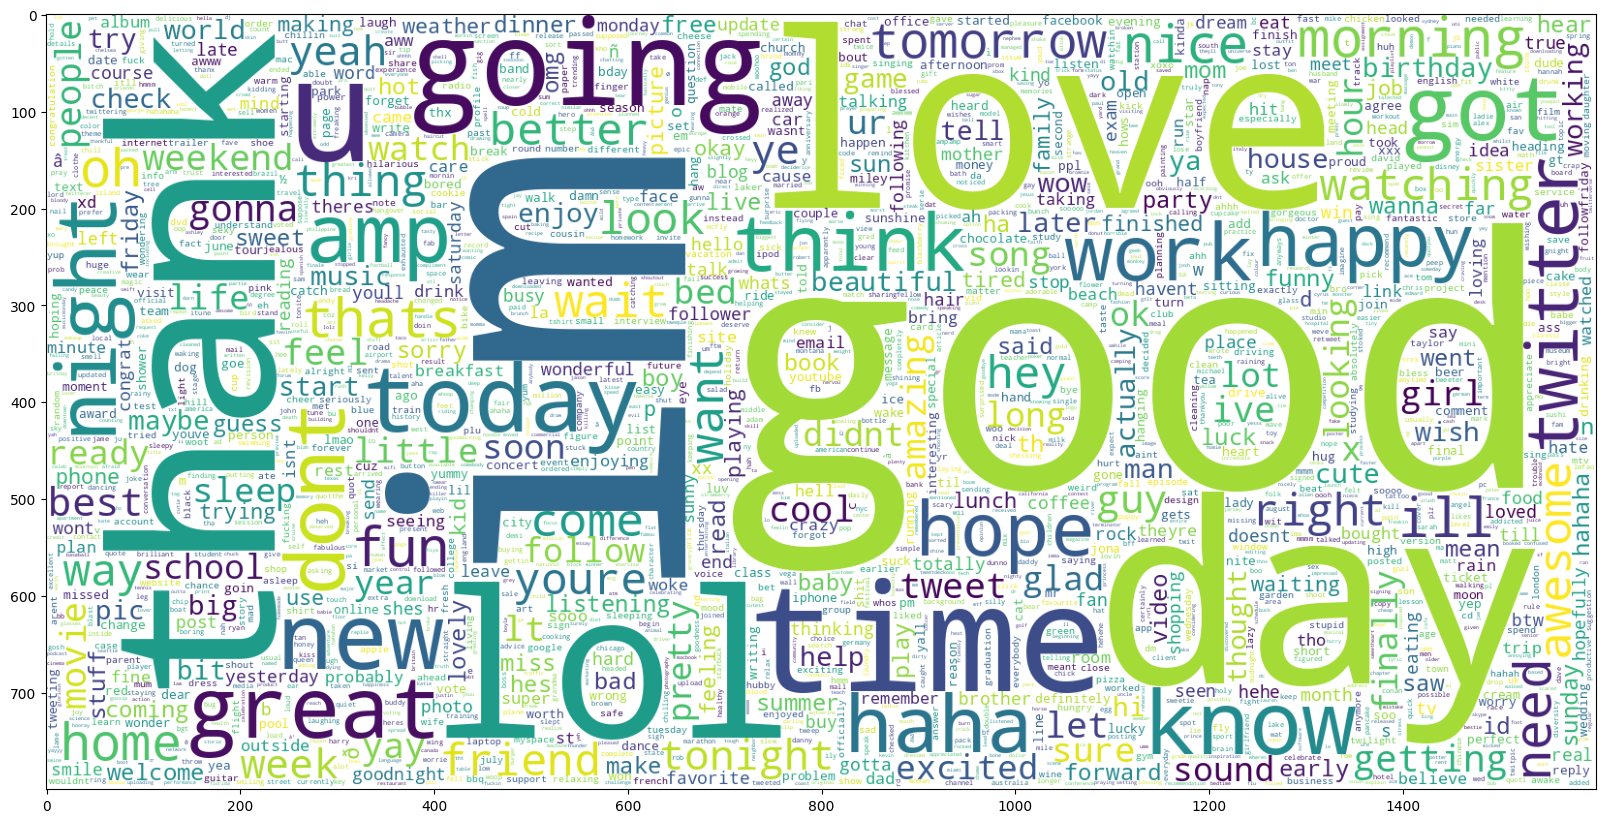

In [ ]:
wordCloud(df.loc[df["target"] == 1, "text"],2000)

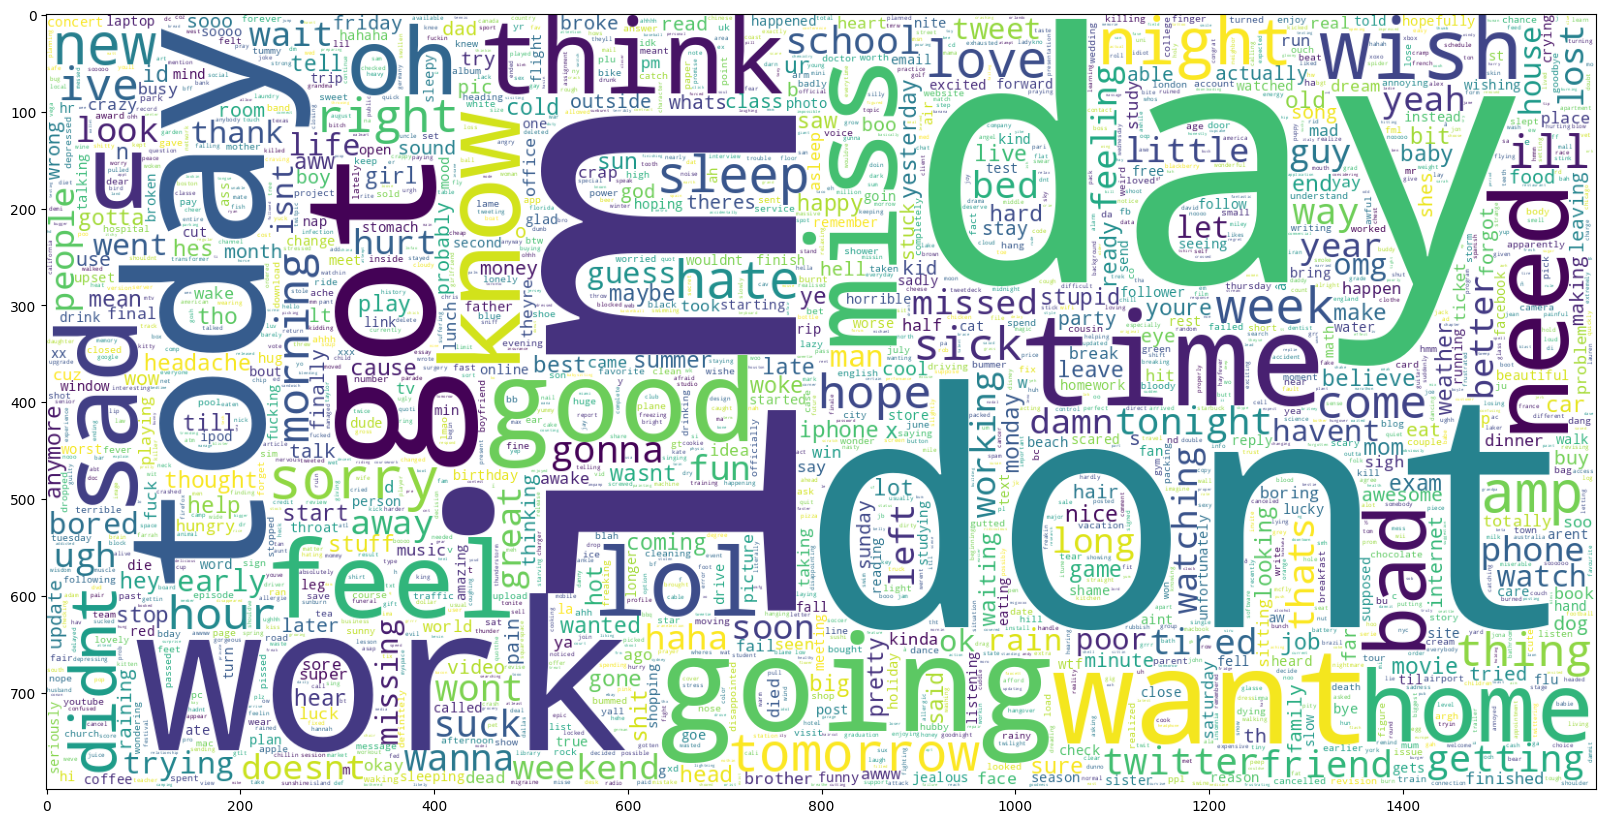

In [ ]:
wordCloud(df.loc[df["target"] == 0, "text"], 2000)

In [ ]:
# Calculating tweet’s lenght :
df["text_length"] = df["text"].apply(len)


# let's show the mean word count of each sentiment :
round(pd.DataFrame(df.groupby("target").text_length.mean()),2)

text_length
target             
0             41.25
1             40.92

In [ ]:
# Generating one row :
df_reduced = df.sample(frac =.10)

# Displaying the reduced dataset :
df_reduced

target                                               text  \
786394        0                         ok feeling bad bitchy text   
1086961       1  beautiful disease rocked watching true life am...   
1228391       1             early hellit supposed functional today   
946807        1   love new cari believe got car self sorry talking   
340914        0                               ive got aww think xx   
...         ...                                                ...   
1130863       1             thats case suggest lonelytwitterclub x   
1400781       1  im skinny cute im small im nice im addicted ta...   
1440557       1  came home aeropostaleyeah got money asslol dar...   
1209134       1  stil sore difficult tell thats waking trip gym...   
1363513       1         long week short weekend starting new place   

                                          tokenized_tweets  \
786394                    [ok, feeling, bad, bitchy, text]   
1086961  [beautiful, disease, rocked, watching, true, l...   
1228391       [early, hellit, supposed, functional, today]   
946807   [love, new, cari, believe, got, car, self, sor...   
340914                          [ive, got, aww, think, xx]   
...                                                    ...   
1130863       [thats, case, suggest, lonelytwitterclub, x]   
1400781  [im, skinny, cute, im, small, im, nice, im, ad...   
1440557  [came, home, aeropostaleyeah, got, money, assl...   
1209134  [stil, sore, difficult, tell, thats, waking, t...   
1363513  [long, week, short, weekend, starting, new, pl...   

                                  tokenized_tweets_stemmed  \
786394                             ok feel bad bitchi text   
1086961         beauti diseas rock watch true life amp bed   
1228391                 earli hellit suppos function today   
946807        love new cari believ got car self sorri talk   
340914                                ive got aww think xx   
...                                                    ...   
1130863              that case suggest lonelytwitterclub x   
1400781  im skinni cute im small im nice im addict tai ...   
1440557  came home aeropostaleyeah got money asslol dar...   
1209134  stil sore difficult tell that wake trip gymswi...   
1363513            long week short weekend start new place   

                       tokenized_tweets_stemmed_lemmatized  text_length  
786394                             ok feel bad bitchi text           26  
1086961         beauti diseas rock watch true life amp bed           51  
1228391                 earli hellit suppos function today           38  
946807        love new cari believ got car self sorri talk           48  
340914                                ive got aww think xx           20  
...                                                    ...          ...  
1130863              that case suggest lonelytwitterclub x           38  
1400781  im skinni cute im small im nice im addict tai ...           60  
1440557  came home aeropostaleyeah got money asslol dar...           66  
1209134  stil sore difficult tell that wake trip gymswi...           83  
1363513            long week short weekend start new place           42  

[146148 rows x 6 columns]

In [ ]:
print( "The shape of the original dataset: " + str(df.shape))
print( "The shape of the reduced dataset: " + str(df_reduced.shape))

The shape of the original dataset: (1461480, 6)
The shape of the reduced dataset: (146148, 6)


In [ ]:
# Separating input feature and label :
X = df["tokenized_tweets_stemmed_lemmatized"]
y = df["target"]

X_reduced = df_reduced["tokenized_tweets_stemmed_lemmatized"]
y_reduced = df_reduced["target"]

In [ ]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced,
                                                                                    test_size=0.15, random_state=100)

In [ ]:
# Quick overview of our dataset:
df.head()

target                                               text  \
0       0     awww thats bummer shoulda got david carr day d   
1       0  upset update facebook texting result school to...   
2       0          dived times ball managed save rest bounds   
3       0                              body feels itchy like   
4       0                                    behaving im mad   

                                    tokenized_tweets  \
0  [awww, thats, bummer, shoulda, got, david, car...   
1  [upset, update, facebook, texting, result, sch...   
2  [dived, times, ball, managed, save, rest, bounds]   
3                         [body, feels, itchy, like]   
4                                [behaving, im, mad]   

                            tokenized_tweets_stemmed  \
0      awww that bummer shoulda got david carr day d   
1  upset updat facebook text result school today ...   
2               dive time ball manag save rest bound   
3                               bodi feel itchi like   
4                                       behav im mad   

                 tokenized_tweets_stemmed_lemmatized  text_length  
0      awww that bummer shoulda got david carr day d           46  
1  upset updat facebook text result school today ...           54  
2               dive time ball manag save rest bound           41  
3                               bodi feel itchi like           21  
4                                       behav im mad           15

In [ ]:
df_reduced.head()

target                                               text  \
786394        0                         ok feeling bad bitchy text   
1086961       1  beautiful disease rocked watching true life am...   
1228391       1             early hellit supposed functional today   
946807        1   love new cari believe got car self sorry talking   
340914        0                               ive got aww think xx   

                                          tokenized_tweets  \
786394                    [ok, feeling, bad, bitchy, text]   
1086961  [beautiful, disease, rocked, watching, true, l...   
1228391       [early, hellit, supposed, functional, today]   
946807   [love, new, cari, believe, got, car, self, sor...   
340914                          [ive, got, aww, think, xx]   

                             tokenized_tweets_stemmed  \
786394                        ok feel bad bitchi text   
1086961    beauti diseas rock watch true life amp bed   
1228391            earli hellit suppos function today   
946807   love new cari believ got car self sorri talk   
340914                           ive got aww think xx   

                  tokenized_tweets_stemmed_lemmatized  text_length  
786394                        ok feel bad bitchi text           26  
1086961    beauti diseas rock watch true life amp bed           51  
1228391            earli hellit suppos function today           38  
946807   love new cari believ got car self sorri talk           48  
340914                           ive got aww think xx           20

In [ ]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
import joblib
joblib.dump(vectoriser, '/content/drive/MyDrive/SP/models/vectoriser.pkl')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  10000


In [ ]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
vectoriser.fit(X_train_reduced)
import joblib
joblib.dump(vectoriser, '/content/drive/MyDrive/SP/models/vectoriser1.pkl')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  1000


In [ ]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

X_train_reduced = vectoriser.transform(X_train_reduced)
X_test_reduced  = vectoriser.transform(X_test_reduced)

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

		The training execution time of this model is 0.42 seconds 

              precision    recall  f1-score   support

           0       0.75      0.70      0.73    111228
           1       0.71      0.76      0.74    107994

    accuracy                           0.73    219222
   macro avg       0.73      0.73      0.73    219222
weighted avg       0.73      0.73      0.73    219222

		 The test execution time of this model is 0.88 seconds 



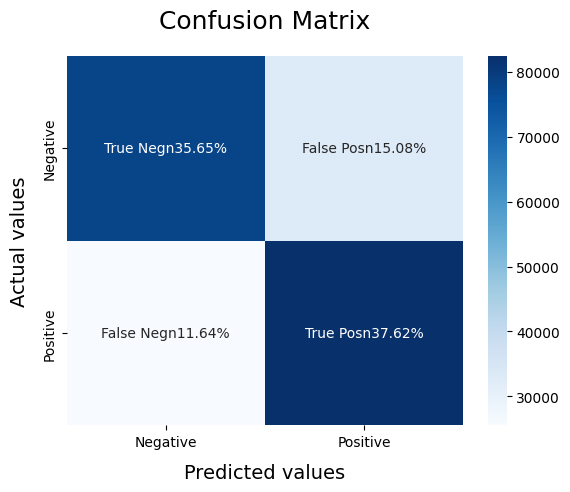

In [ ]:
# Model-1 : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB()
start1 = time.time()
BNBmodel.fit(X_train, y_train)
import joblib

# Save the model
joblib.dump(BNBmodel, '/content/drive/MyDrive/SP/models/BNBmodel.pkl')

end1 = time.time()
print("\t\tThe training execution time of this model is {:.2f} seconds \n".format(end1-start1))

start2 = time.time()
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
end2 = time.time()
print("\t\t The test execution time of this model is {:.2f} seconds \n".format(end2-start2))

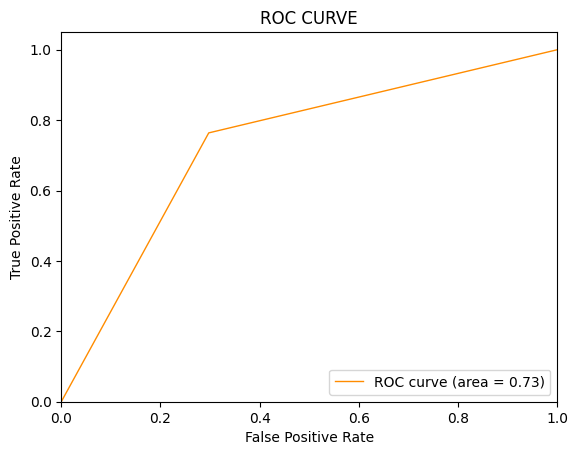

In [ ]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		 The training execution time of this model is 30.99 seconds

              precision    recall  f1-score   support

           0       0.76      0.71      0.73    111228
           1       0.72      0.77      0.74    107994

    accuracy                           0.74    219222
   macro avg       0.74      0.74      0.74    219222
weighted avg       0.74      0.74      0.74    219222

		 The test execution time of this model is 0.81 seconds



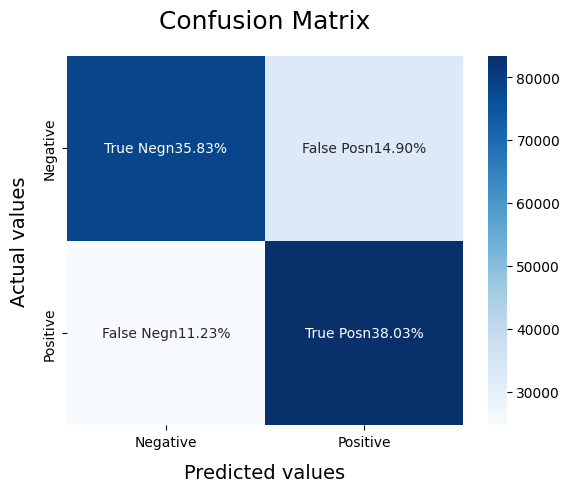

In [ ]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start1 = time.time()
SVCmodel.fit(X_train, y_train)
import joblib

# Save the model
joblib.dump(SVCmodel, '/content/drive/MyDrive/SP/models/SVC.pkl')
end1 = time.time()
print("\t\t The training execution time of this model is {:.2f} seconds\n".format(end1-start1))
start2 = time.time()
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
end2 = time.time()
print("\t\t The test execution time of this model is {:.2f} seconds\n".format(end2-start2))

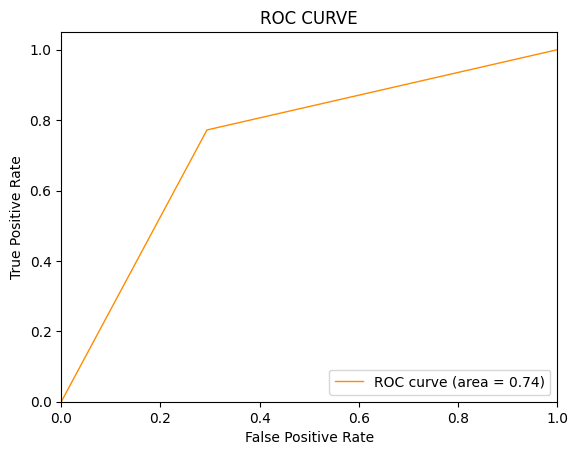

In [ ]:
# Plot the ROC-AUC Curve for model-2 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		⚠️⚠️⚠️ The training execution time of this model is 31.67 seconds ⚠️⚠️⚠️

              precision    recall  f1-score   support

           0       0.76      0.71      0.73    111228
           1       0.72      0.77      0.74    107994

    accuracy                           0.74    219222
   macro avg       0.74      0.74      0.74    219222
weighted avg       0.74      0.74      0.74    219222

		⚠️⚠️⚠️ The test execution time of this model is 2.43 seconds ⚠️⚠️⚠️



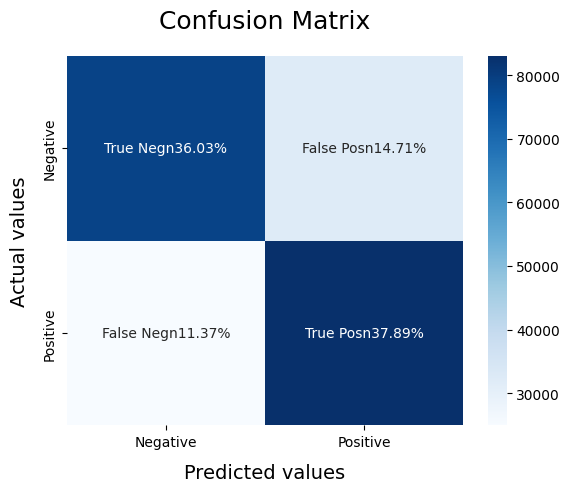

In [ ]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start1 = time.time()
LRmodel.fit(X_train, y_train)
import joblib
joblib.dump(LRmodel, '/content/drive/MyDrive/SP/models/LRmodel.pkl')
end1 = time.time()
print("\t\t⚠️⚠️⚠️ The training execution time of this model is {:.2f} seconds ⚠️⚠️⚠️\n".format(end1-start1))
start2 = time.time()
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
end2 = time.time()
print("\t\t⚠️⚠️⚠️ The test execution time of this model is {:.2f} seconds ⚠️⚠️⚠️\n".format(end2-start2))

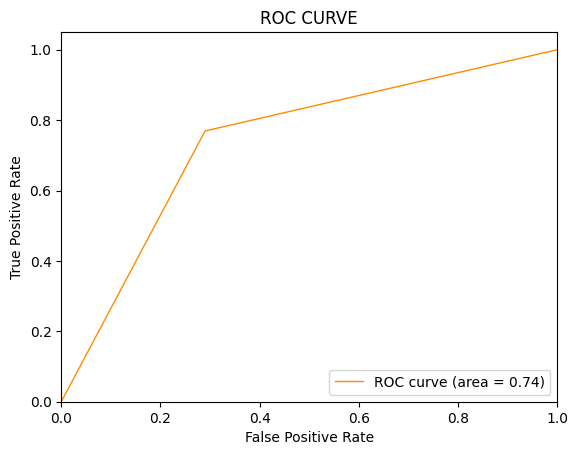

In [ ]:
# Plot the ROC-AUC Curve for model-3 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
int(sqrt(len(df))) # 𝑘 = sqrt(len(df) = 𝑠𝑞𝑟𝑡(𝑛) = sqrt(len(df)

1208

		The training execution time of this model is 37.97 seconds

              precision    recall  f1-score   support

           0       0.70      0.68      0.69    111228
           1       0.68      0.70      0.69    107994

    accuracy                           0.69    219222
   macro avg       0.69      0.69      0.69    219222
weighted avg       0.69      0.69      0.69    219222

		The test execution time of this model is 1.16 seconds



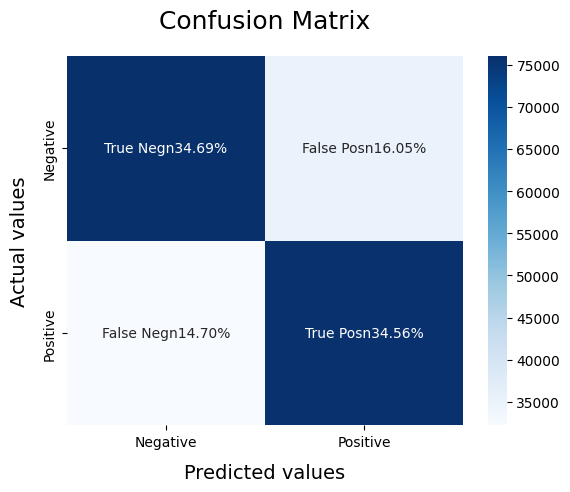

In [ ]:
# Model-5 : Decision Tree
clf = DecisionTreeClassifier() ## Create Decision Tree classifer object
start1 = time.time()
clf = clf.fit(X_train_reduced, y_train_reduced) # Training Decision Tree Classifer
end1 = time.time()
print("\t\tThe training execution time of this model is {:.2f} seconds\n".format(end1-start1))
start2 = time.time()
model_Evaluate(clf) ## Predict the response for test dataset
y_pred5 = clf.predict(X_test)
end2 = time.time()
print("\t\tThe test execution time of this model is {:.2f} seconds\n".format(end2-start2))

In [ ]:
import joblib
joblib.dump(clf, '/content/drive/MyDrive/SP/models/clf.pkl')

['/content/drive/MyDrive/SP/models/clf.pkl']

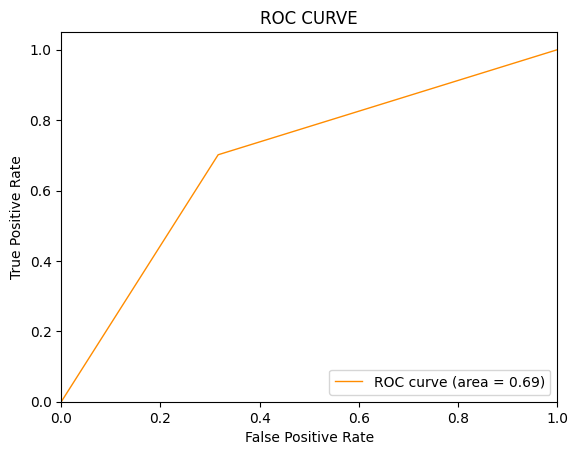

In [ ]:
# Plot the ROC-AUC Curve for model-5 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Predict the tweet whether it is positive or negative

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import joblib

# Load the trained model from file
LRmodel = joblib.load('/content/drive/MyDrive/SP/models/LRmodel.pkl')

# Load the vectorizer from file
vectoriser = joblib.load('/content/drive/MyDrive/SP/models/vectoriser1.pkl')

# Make predictions on new data
new_data = ['New blog of poetry and souls in sync. Thank you for taking time to peek  http://reinem.wordpress.com/', '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds']
new_data_tfidf = vectoriser.transform(new_data)
predictions = LRmodel.predict(new_data_tfidf)

print(predictions)


[0 0]


In [ ]:
import joblib

# Load the trained model from file
LRmodel = joblib.load('/content/drive/MyDrive/SP/models/clf.pkl')

# Load the vectorizer from file
vectoriser = joblib.load('/content/drive/MyDrive/SP/models/vectoriser1.pkl')

# Make predictions on new data

new_data = ['I got 40% in my exam']

new_data_tfidf = vectoriser.transform(new_data)
predictions = LRmodel.predict(new_data_tfidf)


sentence = new_data
print(predictions)
print("Given sentence")
print(sentence)
if predictions == 0:
  print("Sentiment: positive")
else:
  print("Sentiment: negative")


[1]
Given sentence
['I got 40% in my exam']
Sentiment: negative
